In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv("export.csv", parse_dates=["horodate"])


I. Visualization of 

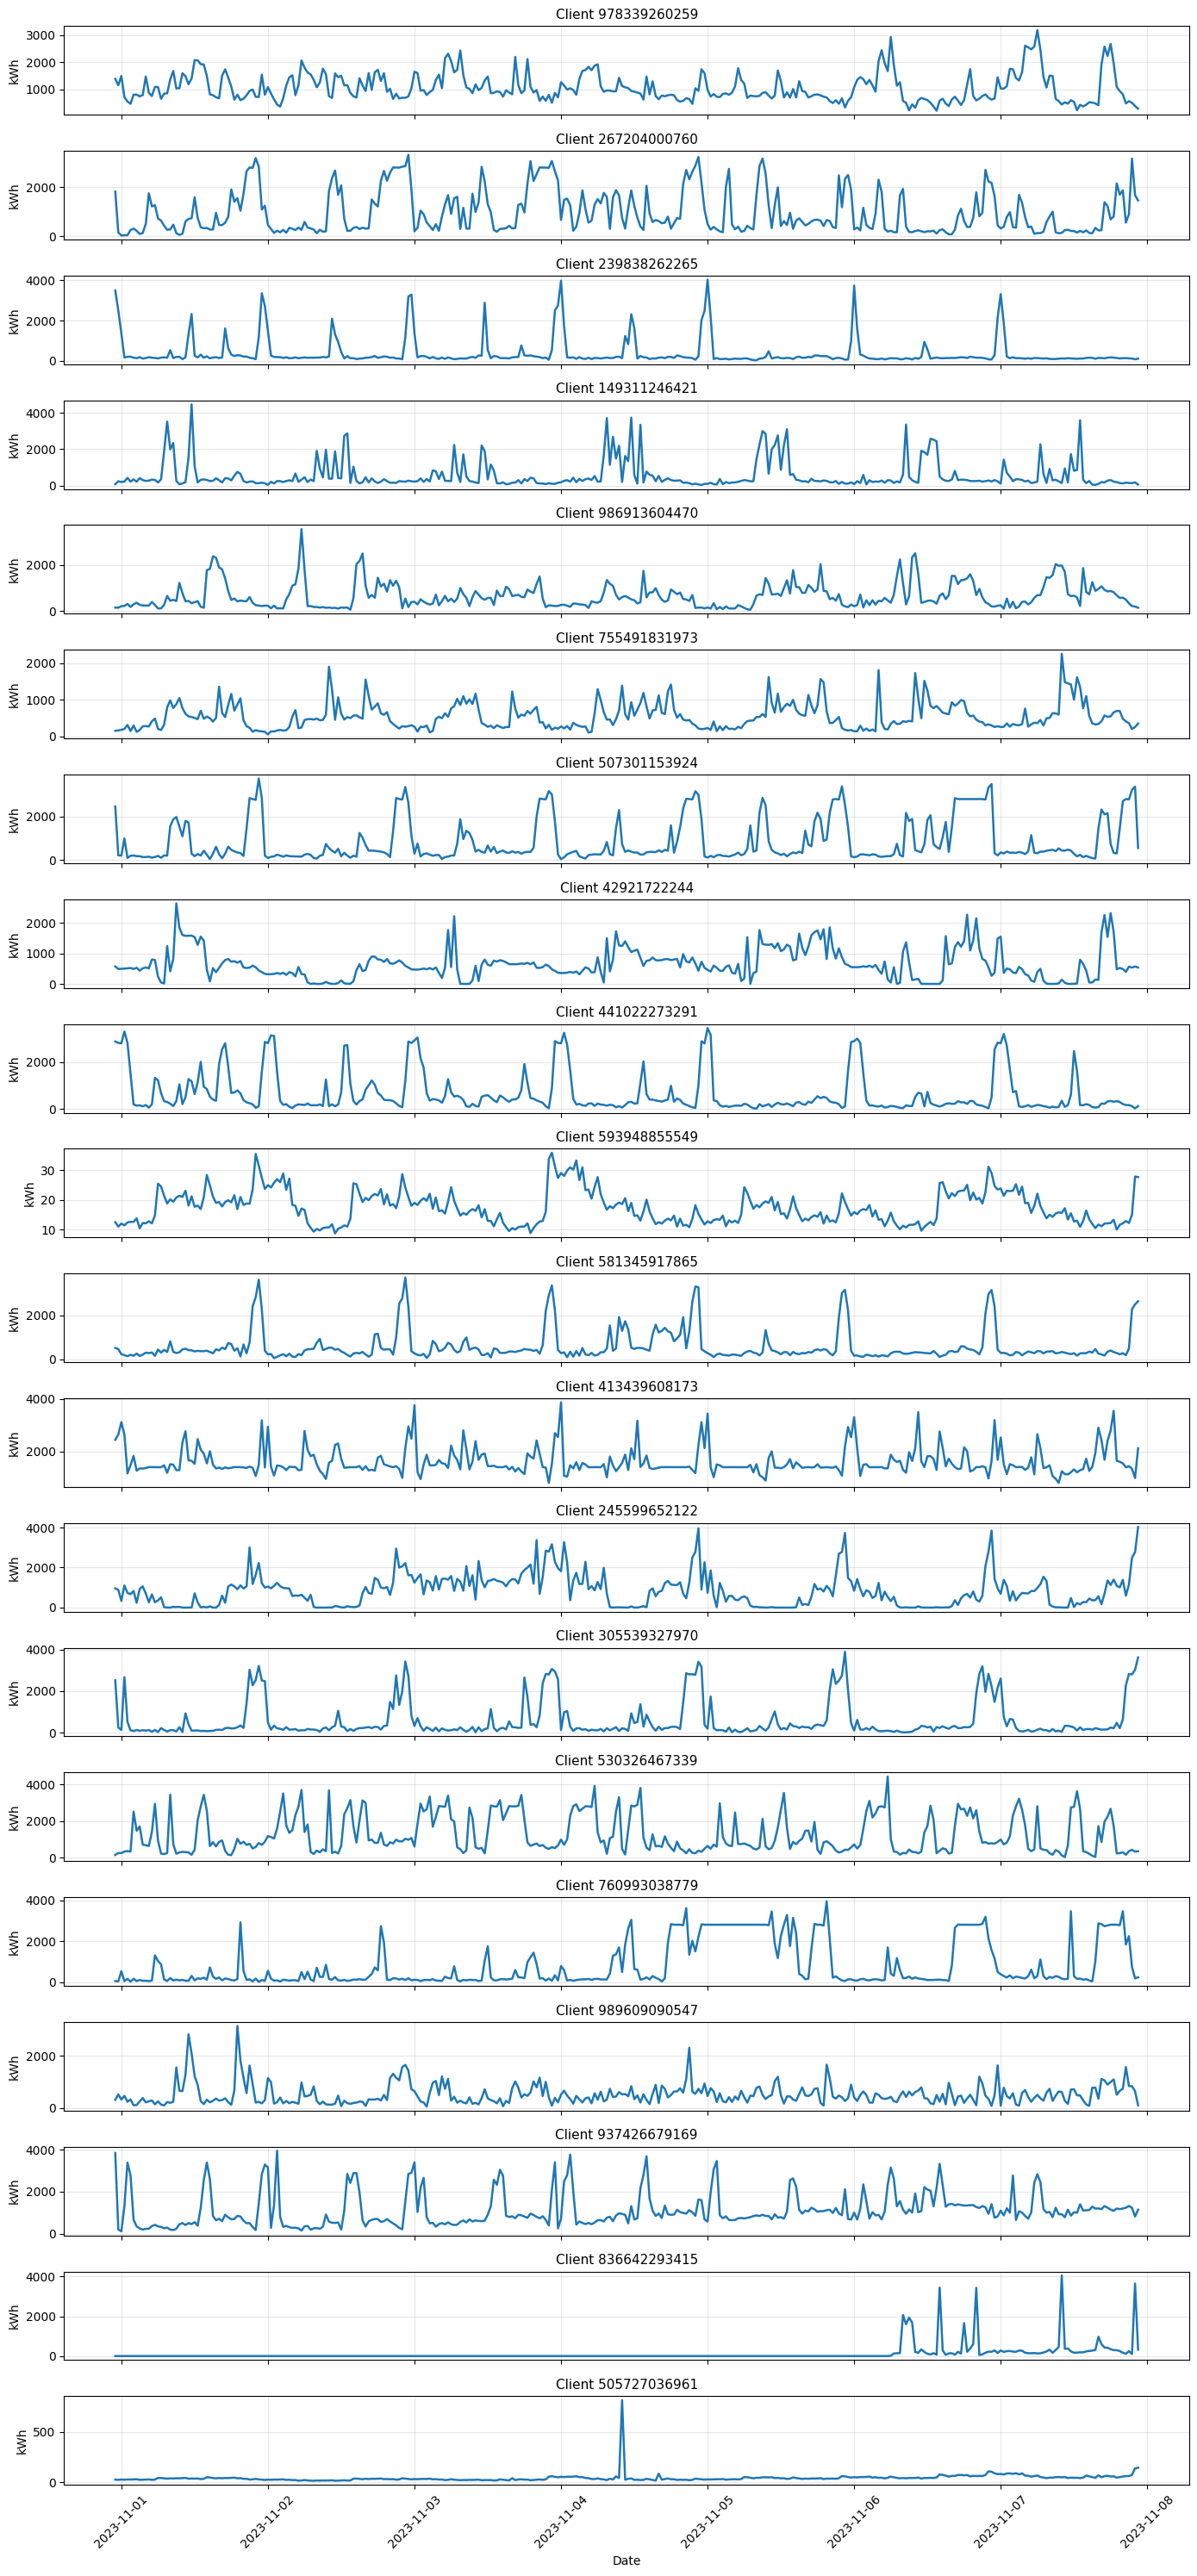

Week: 2023-10-31 → 2023-11-07
Clients: [978339260259 267204000760 239838262265 149311246421 986913604470
 755491831973 507301153924  42921722244 441022273291 593948855549
 581345917865 413439608173 245599652122 305539327970 530326467339
 760993038779 989609090547 937426679169 836642293415 505727036961]


In [ ]:
df['horodate'] = pd.to_datetime(df['horodate'], utc=True)

np.random.seed(42)


# Select 5 random clients
random_clients = np.random.choice(df['id'].unique(), size=20, replace=False)

# Filter data
df_filtered = df[df['id'].isin(random_clients)].copy()

# One week
min_date = df_filtered['horodate'].min()
max_date = min_date + pd.Timedelta(days=7)

df_week = df_filtered[
    (df_filtered['horodate'] >= min_date) &
    (df_filtered['horodate'] < max_date)
]

# ===== SUBPLOTS =====
fig, axes = plt.subplots(len(random_clients), 1, figsize=(14, 30), sharex=True, sharey = True)

for i, client_id in enumerate(random_clients):
    ax = axes[i]
    client_data = df_week[df_week['id'] == client_id].sort_values('horodate')
    
    ax.plot(client_data['horodate'], client_data['valeur'],
            linewidth=1.8)
    
    ax.set_title(f'Client {client_id}', fontsize=11)
    ax.set_ylabel('kWh')
    ax.grid(True, alpha=0.3)

# shared x label
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Week: {min_date.date()} → {max_date.date()}")
print(f"Clients: {random_clients}")


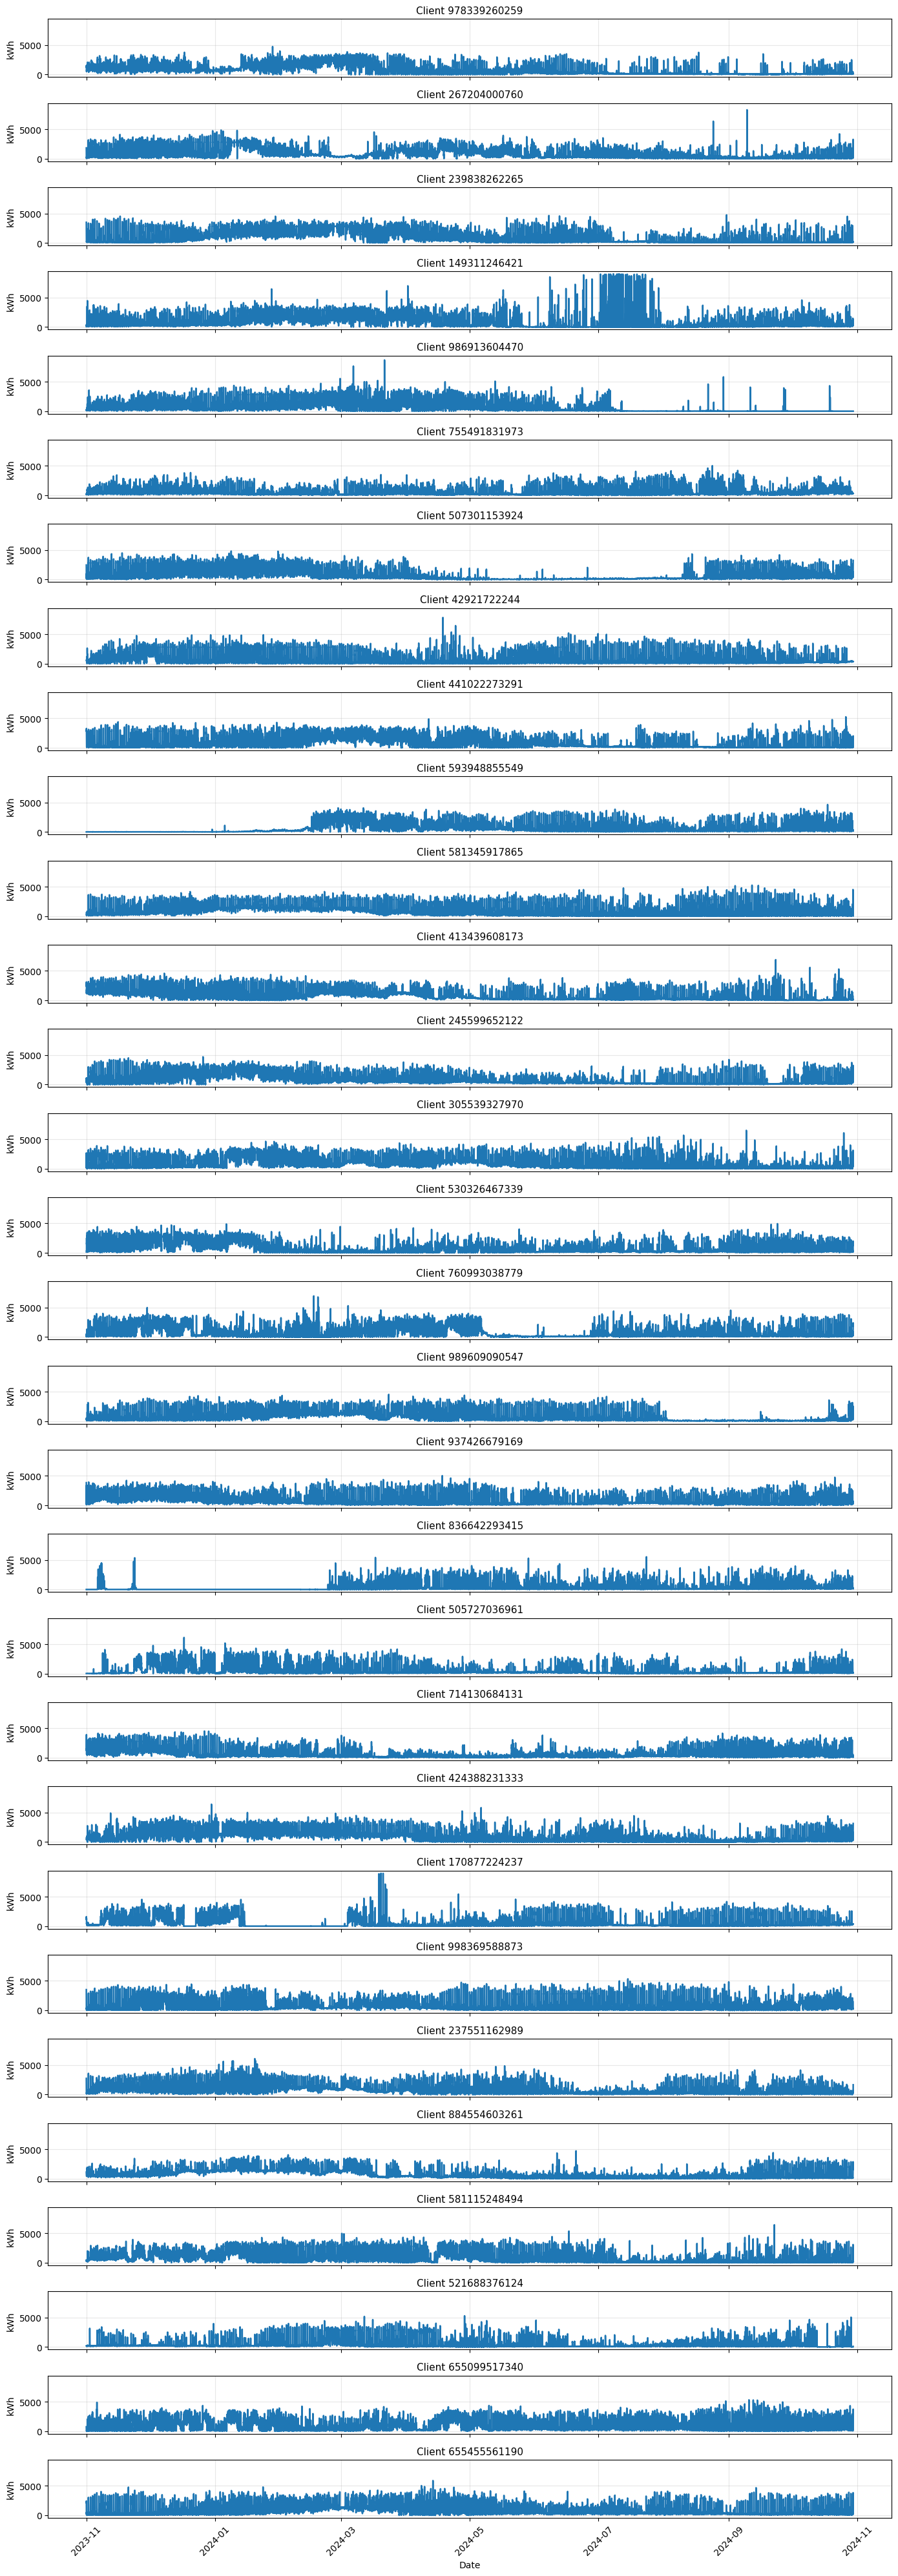

Week: 2023-10-31 → 2023-11-07
Clients: [978339260259 267204000760 239838262265 149311246421 986913604470
 755491831973 507301153924  42921722244 441022273291 593948855549
 581345917865 413439608173 245599652122 305539327970 530326467339
 760993038779 989609090547 937426679169 836642293415 505727036961
 714130684131 424388231333 170877224237 998369588873 237551162989
 884554603261 581115248494 521688376124 655099517340 655455561190]


In [16]:
np.random.seed(42)


# Select 5 random clients
random_clients = np.random.choice(df['id'].unique(), size=30, replace=False)

# Filter data
df_filtered = df[df['id'].isin(random_clients)].copy()

# One wee

# ===== SUBPLOTS =====
fig, axes = plt.subplots(len(random_clients), 1, figsize=(14, 40), sharex=True, sharey = True)

for i, client_id in enumerate(random_clients):
    ax = axes[i]
    client_data = df_filtered[df_filtered['id'] == client_id].sort_values('horodate')
    
    ax.plot(client_data['horodate'], client_data['valeur'],
            linewidth=1.8)
    
    ax.set_title(f'Client {client_id}', fontsize=11)
    ax.set_ylabel('kWh')
    ax.grid(True, alpha=0.3)

# shared x label
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Week: {min_date.date()} → {max_date.date()}")
print(f"Clients: {random_clients}")

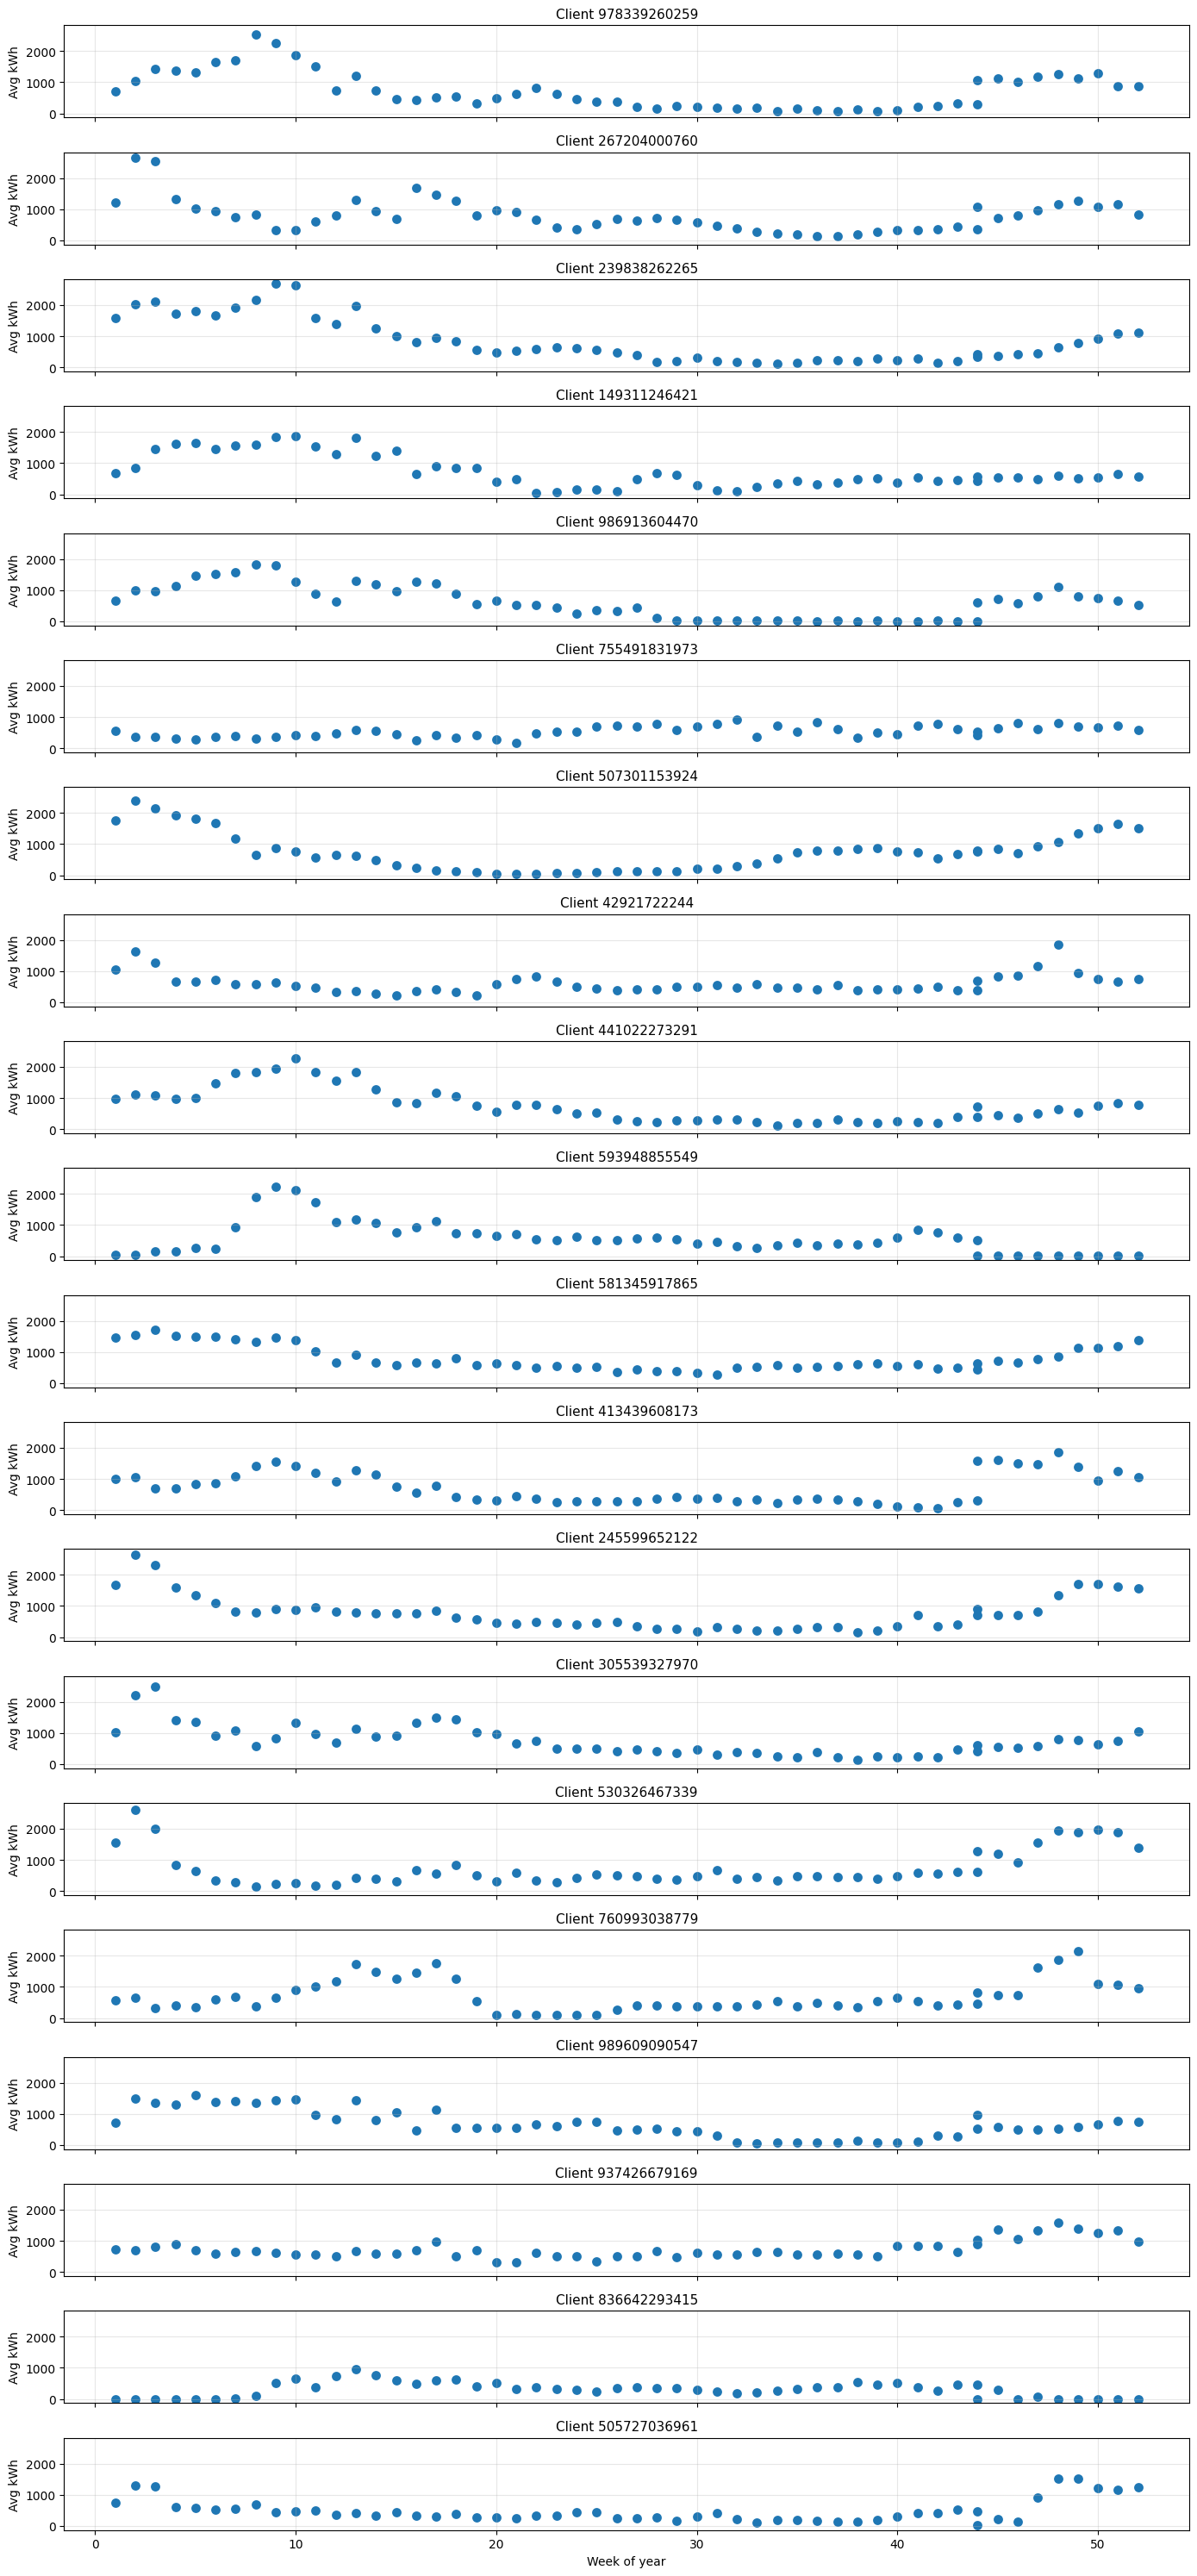

In [7]:
np.random.seed(42)

# Select 5 random clients
random_clients = np.random.choice(df['id'].unique(), size=20, replace=False)

# Filter data
df_filtered = df[df['id'].isin(random_clients)].copy()



# ensure datetime
df_filtered['horodate'] = pd.to_datetime(df_filtered['horodate'], utc=True)

# extract week + year
df_filtered['year'] = df_filtered['horodate'].dt.year
df_filtered['week'] = df_filtered['horodate'].dt.isocalendar().week

# ===== SUBPLOTS =====
fig, axes = plt.subplots(len(random_clients), 1, figsize=(14, 30), sharex=True, sharey=True)

for i, client_id in enumerate(random_clients):
    ax = axes[i]
    
    client_data = df_filtered[df_filtered['id'] == client_id]
    
    # weekly average consumption
    weekly_avg = (
        client_data
        .groupby(['year', 'week'])['valeur']
        .mean()
        .reset_index()
        .sort_values(['year', 'week'])
    )
    
    ax.scatter(weekly_avg['week'], weekly_avg['valeur'], linewidth=1.8)
    
    ax.set_title(f'Client {client_id}', fontsize=11)
    ax.set_ylabel('Avg kWh')
    ax.grid(True, alpha=0.3)

plt.xlabel('Week of year')
plt.tight_layout()
plt.show()


In [8]:
client_stats = (
    df.groupby('id')['valeur']
    .agg(mean_consumption='mean', variance='var')
    .reset_index()
)

print(client_stats)


               id  mean_consumption      variance
0      1704875583        844.783677  6.368613e+05
1      6674572658        803.093739  8.092469e+05
2      9993623468        631.666804  7.119091e+05
3     10607320546        716.334495  4.600007e+05
4     11239534806        553.425418  5.971384e+05
..            ...               ...           ...
495  991737052932        710.407309  1.022837e+06
496  996032197768        908.901500  7.435930e+05
497  996045911412        526.049983  3.332998e+05
498  998369588873        673.185027  6.045147e+05
499  999957685783        551.287191  5.126597e+05

[500 rows x 3 columns]


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# features for clustering
X = client_stats[['mean_consumption', 'variance']]

# scale (VERY important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




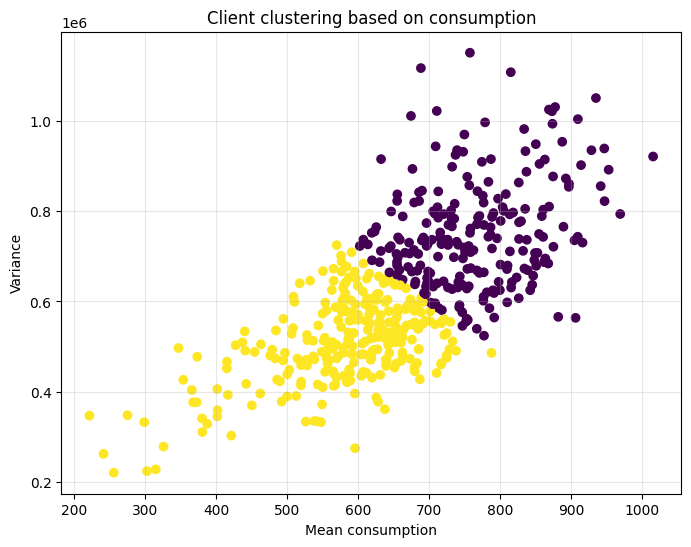

In [10]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
client_stats['cluster'] = kmeans.fit_predict(X_scaled)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(client_stats['mean_consumption'],
            client_stats['variance'],
            c=client_stats['cluster'])

plt.xlabel("Mean consumption")
plt.ylabel("Variance")
plt.title("Client clustering based on consumption")
plt.grid(True, alpha=0.3)
plt.show()



In [17]:
COL_PDL = "id"
COL_DT = "horodate"
COL_PWR = "valeur"

# ensure datetime
df[COL_DT] = pd.to_datetime(df[COL_DT], utc=True)

# useful columns
df["date"] = df[COL_DT].dt.date
df["hour"] = df[COL_DT].dt.hour + df[COL_DT].dt.minute / 60
df["dow"] = df[COL_DT].dt.dayofweek
df["is_weekend"] = df["dow"] >= 5

# half-hour index (0 → 47)
df["hh_index"] = ((df[COL_DT].dt.hour * 60) + df[COL_DT].dt.minute) // 30

daily = (
    df.groupby([COL_PDL, "date"])[COL_PWR]
    .sum()
    .reset_index()
)

daily["energy_kwh"] = daily[COL_PWR] * 0.5

non_zero = daily["energy_kwh"][daily["energy_kwh"] > 0]
TH = np.quantile(non_zero, 0.2)

daily["is_active_day"] = daily["energy_kwh"] >= TH
print("Threshold:", TH)

daily["month"] = pd.to_datetime(daily["date"]).dt.month

def season(m):
    if m in [12,1,2]:
        return "winter"
    elif m in [6,7,8]:
        return "summer"
    else:
        return "mid"

daily["season"] = daily["month"].apply(season)

agg = (
    daily.groupby(COL_PDL)
    .agg(
        n_days=("date","nunique"),
        n_active=("is_active_day","sum")
    )
    .reset_index()
)

agg["r_global"] = agg["n_active"] / agg["n_days"]

daily["month"] = pd.to_datetime(daily["date"]).dt.month


season_stats = (
    daily.groupby([COL_PDL, "season"])["is_active_day"]
    .mean()
    .unstack(fill_value=0)
    .reset_index()
)

features_pdl = agg.merge(season_stats, on=COL_PDL, how="left")

features_pdl.rename(columns={
    "winter": "r_winter",
    "summer": "r_summer",
    "mid": "r_mid"
}, inplace=True)

def label_rp_rs(r):
    if r < 0.3:
        return "RS"
    elif r > 0.7:
        return "RP"
    else:
        return "UNK"

features_pdl["label_rp_rs"] = features_pdl["r_global"].apply(label_rp_rs)
print(features_pdl["label_rp_rs"].value_counts())

def run_stats(active_series):
    runs = []
    count = 0
    
    for val in active_series:
        if val:
            count += 1
        elif count > 0:
            runs.append(count)
            count = 0
    
    if count > 0:
        runs.append(count)
    
    if len(runs) == 0:
        return pd.Series({"n_runs":0, "mean_run_len":0.0})
    
    return pd.Series({
        "n_runs": len(runs),
        "mean_run_len": np.mean(runs)
    })

runs_stats = (
    daily.sort_values([COL_PDL, "date"])
    .groupby(COL_PDL)["is_active_day"]
    .apply(lambda x: run_stats(x).to_dict())
    .apply(pd.Series)
    .reset_index()
)

features_pdl = features_pdl.merge(runs_stats, on=COL_PDL, how="left")



from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cols_feat = [
    "r_global",
    "r_winter",
    "r_summer",
    "r_mid",
    "n_runs",
    "mean_run_len"
]

X = features_pdl[cols_feat].fillna(0).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
features_pdl["cluster"] = kmeans.fit_predict(X_scaled)

print(features_pdl["cluster"].value_counts())

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(features_pdl["r_global"],
            features_pdl["mean_run_len"],
            c=features_pdl["cluster"])

plt.xlabel("Occupancy rate")
plt.ylabel("Mean run length")
plt.title("Client clustering")
plt.show()




Threshold: 6768.7300000000005
label_rp_rs
RP     383
UNK    117
Name: count, dtype: int64


KeyError: "['n_runs', 'mean_run_len'] not in index"